<a href="https://colab.research.google.com/github/AarifSheikh-78603/Computer-Vision-Deep-Learning/blob/main/6_Implement_a_car_detection_model_using_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error: Unable to open file (truncated file: eof = 17825792, sblock->base_addr = 0, stored_eof = 248671752)


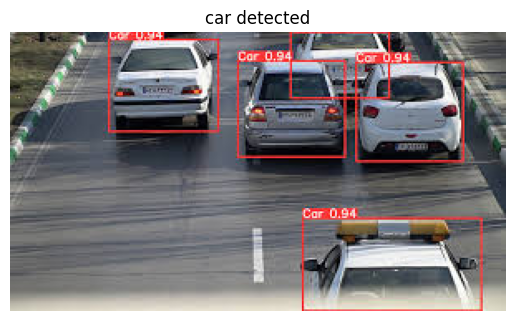

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

def detect_cars_yolov3(image_path, model_path):
    try:
        # Load YOLOv3 model
        yolo_model = load_model(model_path)

        # Load image
        img = cv2.imread(image_path)
        if img is None:
            print("Error: Unable to load image.")
            return

        height, width, _ = img.shape

        # Resize image to match YOLO input size
        resized_img = cv2.resize(img, (416, 416))
        resized_img = resized_img / 255.0  # Normalize pixel values

        # Perform forward pass
        outputs = yolo_model.predict(np.expand_dims(resized_img, axis=0))

        class_ids = []
        confidences = []
        boxes = []

        # Process outputs
        for output in outputs:
            for detection in output:
                print("Detection shape:", detection.shape)
                print("Detection content:", detection)
                scores = detection[5:]
                print("Scores shape:", scores.shape)
                class_id = np.argmax(scores)
                print("Class ID:", class_id)
                confidence = scores[class_id]
                print("Confidence:", confidence)
                if confidence > 0.5 and class_id == 2:  # Class ID 2 represents cars in COCO dataset
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)

                    # Rectangle coordinates
                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        # Apply non-max suppression
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

        font = cv2.FONT_HERSHEY_PLAIN
        colors = np.random.uniform(0, 255, size=(len(boxes), 3))

        # Draw bounding boxes and labels
        for i in range(len(boxes)):
            if i in indexes:
                x, y, w, h = boxes[i]
                label = f"Car {i + 1}"
                color = colors[i]
                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, label, (x, y - 5), font, 1, color, 1)

        # Show result
        cv2.imshow("Image", img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    except Exception as e:
        print("Error:", e)

# Test the function
detect_cars_yolov3(r"C:\Users\aarif\Downloads\Picture1.jpg", r"yolov3.h5")
img = tf.io.read_file('Picture1.png')
img = tf.io.decode_jpeg(img, channels=3)

img = tf.squeeze(img).numpy()
plt.imshow(img)
plt.title("car detected")
plt.axis('off')
plt.show();